# Remove small blocks of pixels
and keep only blocks larger than a given value

In [1]:
# import modules and set some matplotlib params 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from astropy.io import fits

cmap=plt.cm.gray
cmap = mpl.colors.ListedColormap(['white', 'cyan','red','green','yellow','purple','blue'])
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'


read the fits file,
define the threshold and show the image

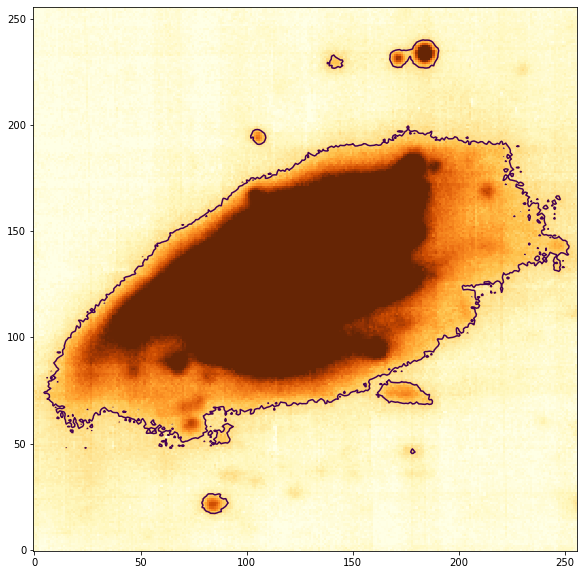

In [2]:
ifile='ima.fits'
data=fits.getdata(ifile,1)

lum_thres=3
plt.figure()
plt.imshow(data,vmin=0,vmax=10,cmap=plt.cm.YlOrBr);
plt.contour(data,levels=[lum_thres,]);

Now we define a boolean mask selecting all pixels above the threshold.<br />
display the map

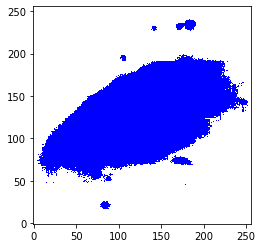

In [3]:
# all points >0 are set to 1
mask0=data>lum_thres

# plot the mask
plt.figure(figsize=(4,4))
plt.imshow(mask0,vmin=0,vmax=1,cmap=cmap);


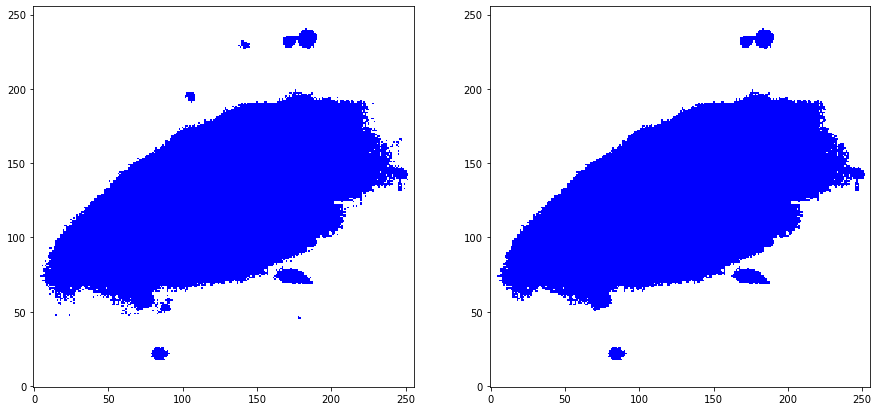

In [4]:
area_thres=50

# label image, create an array that define each island with unique integer
mask_labels, mask_nb = ndimage.label(mask0)
# calculate area of each island
mask_areas = np.array(ndimage.sum(mask0, mask_labels, np.arange(mask_labels.max()+1)))
# select only the islands larger than area_thres
mask_ = mask_areas > area_thres
mask1 = mask_[mask_labels]

fig, (a,b) = plt.subplots(1,2, figsize=(15,7))

a.imshow(mask0,cmap=cmap)
b.imshow(mask1,cmap=cmap);
